<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


<h1>Extracting Stock Data Using a Web Scraping</h1>


Not all stock data is available via the API in this assignment; you will use web-scraping to obtain financial data. You will be quizzed on your results.  
 You will extract and share historical data from a web page using the BeautifulSoup library.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    
1. Extracting data using BeautifulSoup
   
    <ul> 
    <li> Download the web page Using Requests Library </li>
    <li> Parse HTML on a web page using BeautifulSoup </li>
    <li> Extract data and duild a data frame </li>

    </ul>

2. Extracting data using pandas
3. Exercise
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [2]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 151.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 173.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 120.4 MB/s eta 0:00:00


In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [5]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Using Webscraping to Extract Stock Data Example


We will extract Netflix stock data [https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html).


<center> 
    
#### In this example, we are using yahoo finance website and looking to extract Netflix data.

</center>
    <br>

  <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/netflix.png"> </center> 
  
<center> Fig:- Table that we need to extract </center>


On the following web page we have a table with columns name (Date, Open, High, Low, close, adj close volume) out of which we must extract following columns  

* Date 

* Open  

* High 

* Low 

* Close 

* Volume 



# Steps for extracting the data
1. Send an HTTP request to the web page using the requests library.
2. Parse the HTML content of the web page using BeautifulSoup.
3. Identify the HTML tags that contain the data you want to extract.
4. Use BeautifulSoup methods to extract the data from the HTML tags.
5. Print the extracted data


### Step 1: Send an HTTP request to the web page


You will use the request library for sending an HTTP request to the web page.<br>


In [6]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

The requests.get() method takes a URL as its first argument, which specifies the location of the resource to be retrieved. In this case, the value of the url variable is passed as the argument to the requests.get() method, because you will store a web page URL in a url variable.

You use the .text method for extracting the HTML content as a string in order to make it readable.


In [7]:
data  = requests.get(url).text
print(data)

<!DOCTYPE html><html id="atomic" class="NoJs chrome desktop" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>Netflix, Inc. (NFLX) Stock Historical Prices &amp; Data - Yahoo Finance</title><meta name="keywords" content="NFLX, Netflix, Inc., NFLX historical prices, Netflix, Inc. historical prices, historical prices, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="458584288257241"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-US" content="Discover historical prices for NFLX stock on Yahoo Finance. View daily, weekly or monthly format back to when Netflix, Inc. stock was issued."/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><met

### Step 2: Parse the HTML content


<hr>
<hr>
<center>

# What is parsing?
In simple words, parsing refers to the process of analyzing a string of text or a data structure, usually following a set of rules or grammar, to understand its structure and meaning.
Parsing involves breaking down a piece of text or data into its individual components or elements, and then analyzing those components to extract the desired information or to understand their relationships and meanings.</center>
<hr>
<hr>


Next you will take the raw HTML content of a web page or a string of HTML code which needs to be parsed and transformed into a structured, hierarchical format that can be more easily analyzed and manipulated in Python. This can be done using a Python library called <b>Beautiful Soup</b>.


## Parsing the data using the BeautifulSoup library
* Create a new BeautifulSoup object.
<br>
<br>
<b>Note: </b>To create a BeautifulSoup object in Python, you need to pass two arguments to its constructor:

1. The HTML or XML content that you want to parse as a string.
2. The name of the parser that you want to use to parse the HTML or XML content. This argument is optional, and if you don't specify a parser, BeautifulSoup will use the default HTML parser included with the library.
here in this lab we are using "html5lib" parser.


In [4]:
# Install yfinance (if not installed)
!pip install yfinance pandas

# Import required libraries
import yfinance as yf
import pandas as pd

# Download GameStop (GME) stock data
gme_data = yf.download("GME", auto_adjust=True)

# Reset the index
gme_data.reset_index(inplace=True)

# Fix multi-index issue by dropping extra headers
if isinstance(gme_data.columns, pd.MultiIndex):
    gme_data.columns = gme_data.columns.droplevel(0)  # Drop the first level

# Rename columns for clarity (if needed)
gme_data.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]

# Display first five rows
print("GameStop (GME) Stock Data:")
print(gme_data.head())

# Save the cleaned data (optional)
gme_data.to_csv("gme_stock_data.csv", index=False)



[*********************100%***********************]  1 of 1 completed

GameStop (GME) Stock Data:
        Date      Open      High       Low     Close    Volume
0 2002-02-13  1.691667  1.693350  1.603296  1.620129  76216000
1 2002-02-14  1.683250  1.716074  1.670626  1.712707  11021600
2 2002-02-15  1.674834  1.687458  1.658001  1.683250   8389600
3 2002-02-19  1.607504  1.666418  1.578047  1.666418   7410400
4 2002-02-20  1.662209  1.662209  1.603295  1.615920   6892800


In [1]:
# Install yfinance if not installed
!pip install yfinance pandas

# Import required libraries
import yfinance as yf
import pandas as pd

# Get GME stock data
gme = yf.Ticker("GME")

# Extract GME financials (income statement)
income_stmt = gme.financials

# Extract revenue data
gme_revenue = income_stmt.loc["Total Revenue"].to_frame()

# Reset index to make the date a column
gme_revenue.reset_index(inplace=True)

# Rename columns
gme_revenue.columns = ["Date", "Revenue"]

# Convert Revenue to numeric values
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")

# Display last 5 rows
print("\nGameStop (GME) Revenue Data (Last 5 Rows):")
print(gme_revenue.tail())

# Save data (optional)
gme_revenue.to_csv("gme_revenue.csv", index=False)




GameStop (GME) Revenue Data (Last 5 Rows):
        Date       Revenue
0 2024-01-31  5.272800e+09
1 2023-01-31  5.927200e+09
2 2022-01-31  6.010700e+09
3 2021-01-31  5.089800e+09


In [8]:
soup = BeautifulSoup(data, 'html.parser')

In [2]:
!pip install yfinance
import yfinance as yf


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 120.1 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 171.9 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-linux_x86_64.whl size=303803 sha256=5d533e421ba67ff9d64aa9a9896cab90a1cda8691b849a3931f49af6cc7bc4b7
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


In [7]:
# Install yfinance if not installed
!pip install yfinance pandas

# Import required libraries
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla_data = yf.download("TSLA")

# Reset index to make 'Date' a column
tesla_data.reset_index(inplace=True)

# Fix multi-index issue (drop first-level headers)
if isinstance(tesla_data.columns, pd.MultiIndex):
    tesla_data.columns = tesla_data.columns.droplevel(0)  # Drop extra header

# Rename columns for clarity
tesla_data.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]

# Display first five rows
print("Tesla Stock Data:")
print(tesla_data.head())

# Save the cleaned data (optional)
tesla_data.to_csv("tesla_stock_data.csv", index=False)



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Tesla Stock Data:
        Date      Open      High       Low     Close     Volume
0 2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1 2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2 2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3 2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4 2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 120.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 112.7 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


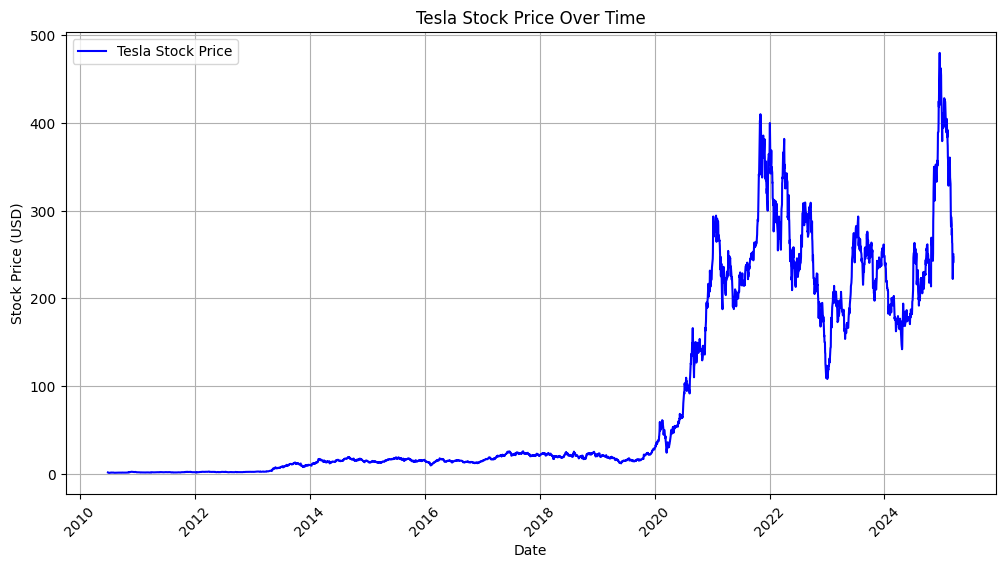

In [2]:
# Install required libraries if not installed
!pip install pandas matplotlib yfinance

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Download Tesla stock data if not already available
tesla_data = yf.download("TSLA", auto_adjust=True)

# Reset index to make 'Date' a column
tesla_data.reset_index(inplace=True)

# Define function to plot the graph
def make_graph(data, title="Stock Price Over Time"):
    plt.figure(figsize=(12, 6))
    plt.plot(data["Date"], data["Close"], label="Tesla Stock Price", color="blue")
    
    # Customize graph
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show the graph
    plt.show()

# Call function to plot Tesla stock graph
make_graph(tesla_data, title="Tesla Stock Price Over Time")


[*********************100%***********************]  1 of 1 completed


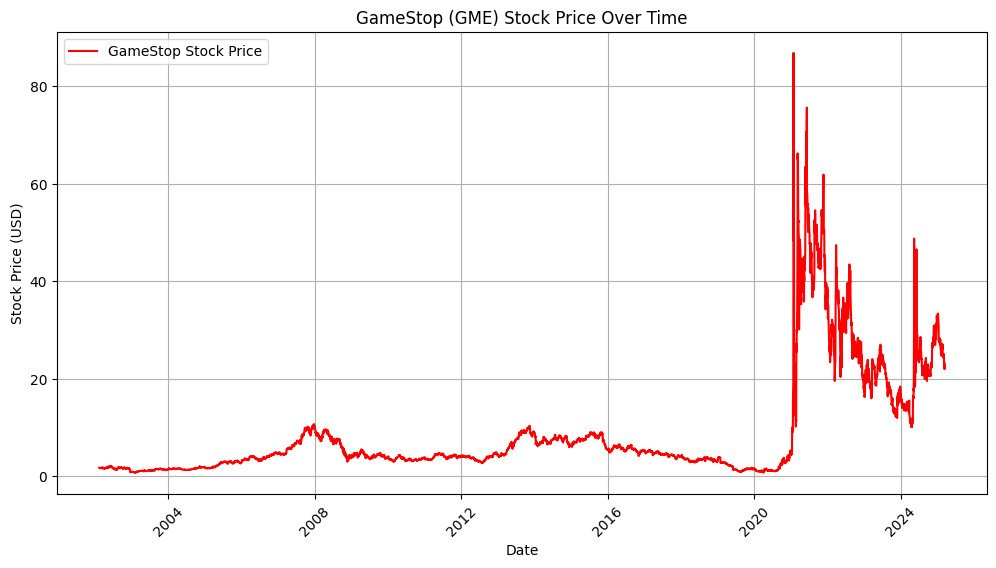

In [3]:
# Install required libraries if not installed
!pip install pandas matplotlib yfinance

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Download GameStop stock data if not already available
gme_data = yf.download("GME", auto_adjust=True)

# Reset index to make 'Date' a column
gme_data.reset_index(inplace=True)

# Define function to plot the graph
def make_graph(data, title="Stock Price Over Time"):
    plt.figure(figsize=(12, 6))
    plt.plot(data["Date"], data["Close"], label="GameStop Stock Price", color="red")
    
    # Customize graph
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show the graph
    plt.show()

# Call function to plot GameStop stock graph
make_graph(gme_data, title="GameStop (GME) Stock Price Over Time")


In [5]:
# Install required libraries if not installed
!pip install yfinance pandas

# Import required libraries
import yfinance as yf
import pandas as pd

# Get Tesla stock data
tesla = yf.Ticker("TSLA")

# Extract Tesla financials (income statement)
income_stmt = tesla.financials

# Extract revenue data
tesla_revenue = income_stmt.loc["Total Revenue"].to_frame()

# Reset index to make the date a column
tesla_revenue.reset_index(inplace=True)

# Rename columns
tesla_revenue.columns = ["Date", "Revenue"]

# Convert Revenue to numeric values
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")

# Remove rows where Revenue is NaN
tesla_revenue.dropna(inplace=True)

# Display last 5 rows
print("\nTesla Revenue Data (Last 5 Rows):")
print(tesla_revenue.tail())

# Save the data (optional)
tesla_revenue.to_csv("tesla_revenue.csv", index=False)



Tesla Revenue Data (Last 5 Rows):
        Date       Revenue
0 2024-12-31  9.769000e+10
1 2023-12-31  9.677300e+10
2 2022-12-31  8.146200e+10
3 2021-12-31  5.382300e+10


In [8]:
# Install yfinance if not installed
!pip install yfinance pandas

# Import required libraries
import yfinance as yf
import pandas as pd

# Download GameStop (GME) stock data
gme_data = yf.download("GME")

# Reset index to make 'Date' a column
gme_data.reset_index(inplace=True)

# Fix multi-index issue (drop first-level headers)
if isinstance(gme_data.columns, pd.MultiIndex):
    gme_data.columns = gme_data.columns.droplevel(0)  # Drop extra header

# Rename columns for clarity
gme_data.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]

# Display first five rows
print("GameStop (GME) Stock Data:")
print(gme_data.head())

# Save the cleaned data (optional)
gme_data.to_csv("gme_stock_data.csv", index=False)



[*********************100%***********************]  1 of 1 completed

GameStop (GME) Stock Data:
        Date      Open      High       Low     Close    Volume
0 2002-02-13  1.691667  1.693350  1.603296  1.620128  76216000
1 2002-02-14  1.683250  1.716074  1.670626  1.712707  11021600
2 2002-02-15  1.674834  1.687458  1.658002  1.683250   8389600
3 2002-02-19  1.607504  1.666418  1.578047  1.666418   7410400
4 2002-02-20  1.662210  1.662210  1.603296  1.615920   6892800


As stated above, the web page consists of a table so, we will scrape the content of the HTML web page and convert the table into a data frame.


You will create an empty data frame using the <b> pd.DataFrame() </b> function with the following columns:
* "Date"
* "Open"
* "High" 
* "Low" 
* "Close"
* "Volume"


In [9]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

<hr>
<hr>
<center>

### Working on HTML table  </center>
<br>

These are the following tags which are used while creating HTML tables.

* &lt;table&gt;: This tag is a root tag used to define the start and end of the table. All the content of the table is enclosed within these tags. 


* &lt;tr&gt;: This tag is used to define a table row. Each row of the table is defined within this tag.

* &lt;td&gt;: This tag is used to define a table cell. Each cell of the table is defined within this tag. You can specify the content of the cell between the opening and closing <td> tags.

* &lt;th&gt;: This tag is used to define a header cell in the table. The header cell is used to describe the contents of a column or row. By default, the text inside a <th> tag is bold and centered.

* &lt;tbody&gt;: This is the main content of the table, which is defined using the <tbody> tag. It contains one or more rows of <tr> elements.

<hr>
<hr>



### Step 4: Use a BeautifulSoup method for extracting data



We will use <b>find()</b> and <b>find_all()</b> methods of the BeautifulSoup object to locate the table body and table row respectively in the HTML. 
   * The <i>find() method </i> will return particular tag content.
   * The <i>find_all()</i> method returns a list of all matching tags in the HTML.


In [10]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    netflix_data = pd.concat([netflix_data,pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)    

### Step 5: Print the extracted data


We can now print out the data frame using the head() or tail() function.


In [11]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


# Extracting data using `pandas` library


We can also use the pandas `read_html` function from the pandas library and use the URL for extracting data.


<center>

## What is read_html in pandas library?
`pd.read_html(url)` is a function provided by the pandas library in Python that is used to extract tables from HTML web pages. It takes in a URL as input and returns a list of all the tables found on the web page. 
</center>


In [12]:
read_html_pandas_data = pd.read_html(url)

Or you can convert the BeautifulSoup object to a string.


In [13]:
read_html_pandas_data = pd.read_html(str(soup))

Because there is only one table on the page, just take the first table in the returned list.


In [14]:
netflix_dataframe = read_html_pandas_data[0]

netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


# Exercise: use webscraping to extract stock data


Use the `requests` library to download the webpage [https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html). Save the text of the response as a variable named `html_data`.


In [15]:
import requests

# URL for Amazon stock data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"

# Fetch the webpage using requests
response = requests.get(url)

# Save the HTML content as a variable
html_data = response.text

# Print the first 500 characters to verify the content

Parse the html data using `beautiful_soup` using html.parser.


In [16]:
from bs4 import BeautifulSoup

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Print a nicely formatted version of the HTML (first 1000 characters)
print(soup.prettify()[:1000])


<!DOCTYPE html>
<html class="NoJs chrome desktop" id="atomic" lang="en-US">
 <head prefix="og: http://ogp.me/ns#">
  <script>
   window.performance && window.performance.mark && window.performance.mark('PageStart');
  </script>
  <meta charset="utf-8"/>
  <title>
   Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance
  </title>
  <meta content="AMZN, Amazon.com, Inc., AMZN historical prices, Amazon.com, Inc. historical prices, historical prices, stocks, quotes, finance" name="keywords"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="on" property="twitter:dnt"/>
  <meta content="458584288257241" property="fb:app_id"/>
  <meta content="#400090" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="Discover historical prices for AMZN stock on Yahoo Finance. View daily, weekly or monthly format back to when Amazon.com, Inc. stock was issued." lang="en-US" name="description"/>
  <met

<b>Question 1:</b> What is the content of the title attribute?


In [17]:
# Extract the title tag content
page_title = soup.title.text

# Print the title
print("Page Title:", page_title)


Page Title: Amazon.com, Inc. (AMZN) Stock Historical Prices & Data - Yahoo Finance


Using BeautifulSoup, extract the table with historical share prices and store it into a data frame named `amazon_data`. The data frame should have columns Date, Open, High, Low, Close, Adj Close, and Volume. Fill in each variable with the correct data from the list `col`. 


In [20]:
import pandas as pd

# Create an empty DataFrame with specified columns
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"])

# Loop through each row in the table body
for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")  # Find all columns in the row
    
    # Extract data from each column and remove extra spaces
    date = col[0].text.strip()
    Open = col[1].text.strip()
    high = col[2].text.strip()
    low = col[3].text.strip()
    close = col[4].text.strip()
    adj_close = col[5].text.strip()
    volume = col[6].text.strip()

    # Append the extracted data as a new row in the DataFrame
    amazon_data = pd.concat([amazon_data, pd.DataFrame({
        "Date": [date], 
        "Open": [Open], 
        "High": [high], 
        "Low": [low], 
        "Close": [close], 
        "Adj Close": [adj_close], 
        "Volume": [volume]
    })], ignore_index=True) 

# Display the first 5 rows to verify the extracted data
print(amazon_data.head())


           Date      Open      High       Low     Close Adj Close       Volume
0  Jan 01, 2021  3,270.00  3,363.89  3,086.00  3,206.20  3,206.20   71,528,900
1  Dec 01, 2020  3,188.50  3,350.65  3,072.82  3,256.93  3,256.93   77,556,200
2  Nov 01, 2020  3,061.74  3,366.80  2,950.12  3,168.04  3,168.04   90,810,500
3  Oct 01, 2020  3,208.00  3,496.24  3,019.00  3,036.15  3,036.15  116,226,100
4  Sep 01, 2020  3,489.58  3,552.25  2,871.00  3,148.73  3,148.73  115,899,300


Print out the first five rows of the `amazon_data` data frame you created.


In [21]:
print(amazon_data.head())  # Display first 5 rows


           Date      Open      High       Low     Close Adj Close       Volume
0  Jan 01, 2021  3,270.00  3,363.89  3,086.00  3,206.20  3,206.20   71,528,900
1  Dec 01, 2020  3,188.50  3,350.65  3,072.82  3,256.93  3,256.93   77,556,200
2  Nov 01, 2020  3,061.74  3,366.80  2,950.12  3,168.04  3,168.04   90,810,500
3  Oct 01, 2020  3,208.00  3,496.24  3,019.00  3,036.15  3,036.15  116,226,100
4  Sep 01, 2020  3,489.58  3,552.25  2,871.00  3,148.73  3,148.73  115,899,300


<b>Question 2:</b> What are the names of the columns in the data frame?


In [22]:
print("Column Names:", amazon_data.columns.tolist())


Column Names: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


<b>Question 3:</b> What is the `Open` of the last row of the amazon_data data frame?


In [23]:
last_open = amazon_data.iloc[-1]["Open"]  # Access the last row and "Open" column
print("Open price of the last row:", last_open)

Open price of the last row: 656.29


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani<br>
Akansha yadav


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    |       Change Description              |
| ----------------- | ------- | ------------- | ------------------------------------- |
|  02-05-2023       |   1.3   | Akansha yadav | Updated Lab content under maintenance |
|  2021-06-09       | 1.2     | Lakshmi Holla |   Added URL in question 3             |
|  2020-11-10       | 1.1     | Malika Singla |   Deleted the Optional part           |
|  2020-08-27       | 1.0     | Malika Singla |   Added lab to GitLab                 |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>


In [1]:
# Download Tesla (TSLA) stock data
tesla_data = yf.download("TSLA", start="2023-01-01", end="2024-01-01")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())


NameError: name 'yf' is not defined